<a href="https://colab.research.google.com/github/psgrigoletti/margem-liquida-colab/blob/main/investpy_teste_2_curva_de_juros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dividendos dos seus FIIS - 2020

In [1]:
!pip install investpy

In [5]:
import investpy

In [3]:
search_result = investpy.search_quotes(text='FI Imobiliario Guardian Logistica Unica', products=['stocks'],
                                       countries=['Brazil'], n_results=1)
information = search_result.retrieve_information()
print(information)

{'prevClose': 96.91, 'dailyRange': '96.92-97.2', 'revenue': '-', 'open': 97.19, 'weekRange': '93.21-115.92', 'eps': '-', 'volume': 4543, 'marketCap': '-', 'dividend': '10.08(10.09%)', 'avgVolume': 12780, 'ratio': '-', 'beta': '-', 'oneYearReturn': '-16.66%', 'sharesOutstanding': '-', 'nextEarningDate': '-'}


In [4]:
technical_indicators = search_result.retrieve_technical_indicators(interval="daily")
print(technical_indicators)

              indicator    value           signal
0               RSI(14)  35.8500             sell
1            STOCH(9,6)  34.2350             sell
2          STOCHRSI(14)  49.6120          neutral
3           MACD(12,26)  -0.6700             sell
4               ADX(14)  52.8150             sell
5           Williams %R -75.4720             sell
6               CCI(14) -70.0581             sell
7               ATR(14)   1.0314  less_volatility
8        Highs/Lows(14)   0.0000          neutral
9   Ultimate Oscillator  54.8440              buy
10                  ROC  -2.9030             sell
11  Bull/Bear Power(13)  -0.9460             sell


In [5]:
default_currency = search_result.retrieve_currency()
print(default_currency)

BRL


Taxa de Juros

In [6]:
import investpy as inv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

In [8]:
bondsBR = inv.get_bonds_list("brazil")
bondsBR

['Brazil 3M',
 'Brazil 6M',
 'Brazil 9M',
 'Brazil 1Y',
 'Brazil 2Y',
 'Brazil 3Y',
 'Brazil 5Y',
 'Brazil 8Y',
 'Brazil 10Y']

In [10]:
bonds_overview = inv.get_bonds_overview("brazil")
bonds_overview

,country,name,last,last_close,high,low,change,change_percentage
0,brazil,Brazil 3M,11.672,11.118,11.133,11.098,+0.554,+4.99%
1,brazil,Brazil 6M,12.431,11.970,11.970,11.840,+0.461,+3.85%
2,brazil,Brazil 9M,12.698,12.410,12.410,12.270,+0.289,+2.32%
3,brazil,Brazil 1Y,12.644,12.540,12.540,12.440,+0.103,+0.83%
4,brazil,Brazil 2Y,11.533,12.185,12.185,12.035,-0.652,-5.35%
5,brazil,Brazil 3Y,11.477,11.477,11.590,11.477,-0.054,0.00%
6,brazil,Brazil 5Y,11.109,11.140,11.435,11.140,-0.031,-0.28%
7,brazil,Brazil 8Y,11.150,11.200,11.555,11.200,-0.050,-0.45%
8,brazil,Brazil 10Y,11.211,11.260,11.555,11.260,-0.049,-0.44%


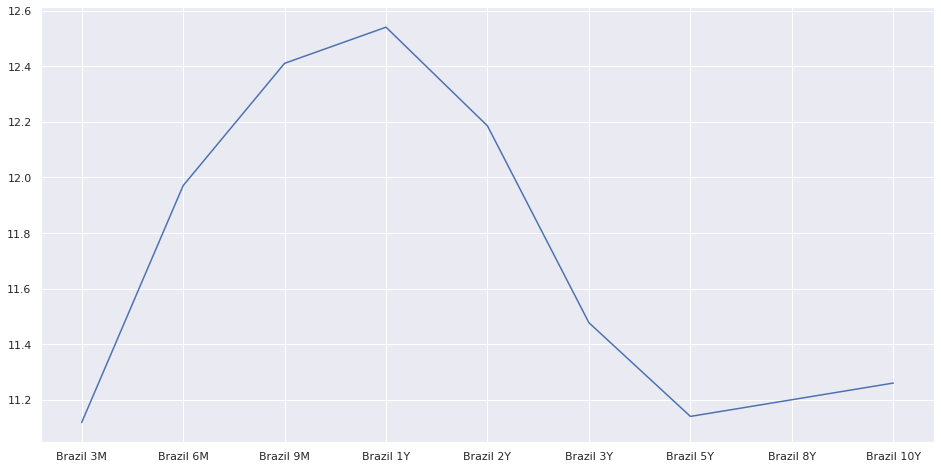

In [11]:
plt.plot(bondsBR, bonds_overview['last_close'])

In [13]:
data_inicio = '01/01/2010'
data_fim = '19/02/2022'
um_ano = inv.get_bond_historical_data("Brazil 1Y", from_date=data_inicio, to_date=data_fim)
um_ano

,Open,High,Low,Close
Date,,,,
2010-01-04,11.040,11.416,11.010,11.360
2010-01-05,11.370,11.400,11.310,11.320
2010-01-06,11.350,11.350,11.270,11.295
2010-01-07,11.275,11.416,11.270,11.416
2010-01-08,11.285,11.416,11.205,11.205
...,...,...,...,...
2022-02-14,12.490,12.650,12.490,12.650
2022-02-15,12.475,12.570,12.475,12.570
2022-02-16,12.460,12.570,12.460,12.570


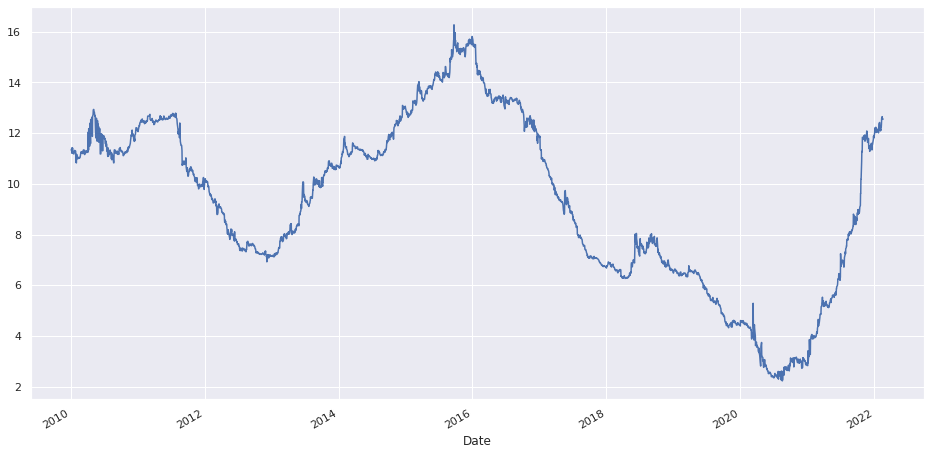

In [14]:
um_ano['Close'].plot()

In [16]:
data_inicio = '01/01/2010'
data_fim = '19/02/2022'
bonds = pd.DataFrame()
for prazo in bondsBR:
  bonds[prazo] = inv.get_bond_historical_data(prazo, from_date=data_inicio, to_date=data_fim)['Close']

In [19]:
bonds.index = pd.to_datetime(bonds.index)

In [20]:
bonds

,Brazil 3M,Brazil 6M,Brazil 9M,Brazil 1Y,Brazil 2Y,Brazil 3Y,Brazil 5Y,Brazil 8Y,Brazil 10Y
Date,,,,,,,,,
2010-01-04,8.680,9.170,10.475,11.360,11.910,12.700,12.740,NaN,NaN
2010-01-05,8.670,9.170,10.445,11.320,11.890,12.740,12.740,NaN,NaN
2010-01-06,8.670,9.140,10.330,11.295,11.820,12.750,12.740,NaN,NaN
2010-01-07,8.700,9.140,10.330,11.416,11.264,12.770,12.770,NaN,NaN
2010-01-08,8.650,9.110,10.300,11.205,11.770,12.760,12.760,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-02-14,11.092,11.985,12.495,12.650,12.250,11.569,11.180,11.24,NaN
2022-02-15,11.088,11.965,12.445,12.570,12.160,11.425,11.115,11.20,11.28
2022-02-16,11.090,11.955,12.435,12.570,12.175,11.520,11.105,11.11,11.19


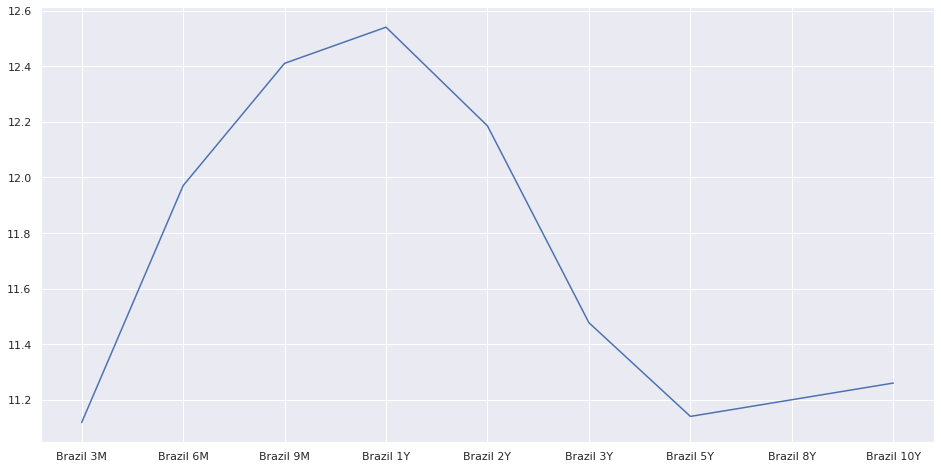

In [24]:
plt.plot(bondsBR, bonds.loc['2022-02-18'].values)

In [27]:
import plotly.graph_objects as go

In [32]:
fig = go.Figure()
for i in bonds.index:
  fig.add_trace(go.Scatter(x=bondsBR, y=bonds.loc[i], mode='lines', name=str(i)))
fig.show()

In [42]:
data_inicio = '01/01/2010'
data_fim = '19/02/2022'
bondsMensais = pd.DataFrame()
for prazo in bondsBR:
  bondsMensais[prazo] = inv.get_bond_historical_data(prazo, from_date=data_inicio, to_date=data_fim, interval="Monthly")['Close']


fig = go.Figure()
for i in bondsMensais.index:
  fig.add_trace(go.Scatter(x=bondsBR, y=bondsMensais.loc[i], mode='lines', name=str(i), visible=False))

fig.data[0].visible = True
steps = []

for i in range(len(fig.data)):
  step = dict(
      method='restyle',
      args=['visible', [False] * len(fig.data)],
      label=fig.data[i]['name'][:7]
  )
  step['args'][1][i]=True
  steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={'prefix': 'Mês: '},
    pad={'t':50},
    steps=steps
)]

fig.update_layout(sliders=sliders, 
                  yaxis=dict(range=[3,14.5]))
fig.show()

In [48]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [59]:
selic_meta = consulta_bc(432)
s2015 = selic_meta[selic_meta.index.year >= 2015]
b2015 = bonds[bonds.index.year >= 2015]

In [61]:
fig = go.Figure()
for i in bondsBR:
  fig.add_trace(go.Scatter(x=b2015.index, y=b2015[i], mode='lines', name=str(i)))

fig.add_trace(go.Scatter(x=s2015.index, y=s2015['valor'], mode='lines', name="SELIC", line={'color':'black'}))
fig.show()